# **Task 2: Dimensionality Reduction via PCA**

## **Goals**

- Implement **Principal Component Analysis (PCA)** to reduce the dimensionality of a dataset containing standardized height and weight measurements for 100 people.  
- Compute and analyze how much variance each principal component captures.  
- Visualize how projecting the data onto the first principal component captures the main trend or correlation between variables.

### **Specific Objectives**

1. **Compute the covariance matrix** of the dataset to describe the relationships between height and weight.  
2. **Perform eigenvalue decomposition** of the covariance matrix using `scipy.linalg.eigh` to find eigenvalues and eigenvectors.  
3. **Identify the principal components** (eigenvectors) and explain how the largest eigenvalue corresponds to the direction of maximum variance.  
4. **Reduce the data from 2D to 1D** by projecting it onto the principal component associated with the largest eigenvalue.  
5. **Visualize** both the original 2D data points and their 1D projection on the principal component line.  
6. **Discuss** how PCA compresses data while preserving most of the variance and interpret what the first principal component represents.
   


---

#### **Key Results**
We applied **Principal Component Analysis (PCA)** to a standardized dataset of height and weight measurements for 100 individuals.

- **Mean (≈ 0)** and **Standard Deviation (≈ 1)** confirm that the dataset is properly standardized.  
- **Covariance Matrix:**  
  $$
  \sigma \approx
  \begin{bmatrix}
  1.026 & 0.118 \\
  0.118 & 1.081
  \end{bmatrix}
  $$
  shows a mild positive correlation between height and weight.  
- **Eigenvalues:** [1.1746, 0.9328]  
  - The first eigenvalue corresponds to **55.7%** of the total variance.  
  - The second accounts for **44.3%**, meaning both variables contribute significantly, but PC1 captures slightly more variation.  
- **Principal Component Vectors:**  
  - PC1 = [0.6211, 0.7838] (direction of greatest variance)  
  - PC2 = [-0.7838, 0.6211] (orthogonal direction capturing the remaining variance)
- **1D Projection:** The data projected onto PC1 shows the main trend, summarizing most of the height–weight variation in one dimension.

---

#### **Interpretation**

The first principal component represents a combined “size” factor  individuals with higher height and weight values have larger PC1 scores.  
Projecting the data onto PC1 reduces the 2D dataset to a single dimension while retaining most of the meaningful variance (~56%).  
The plotted PC1 direction aligns with the main diagonal of the scatter plot, confirming that PCA effectively captures the shared trend between height and weight.


Mean (should be close to 0): [0.05980802 0.08201297]
Std  (should be close to 1): [1.01295977 1.03987946]
Covariance matrix:
 [[1.02608749 0.11769063]
 [0.11769063 1.08134929]]
Eigenvalues (descending): [1.17460905 0.93282774]
Variance explained: [0.55736383 0.44263617]
PC1 vector: [0.62106317 0.78376051]
PC2 vector: [-0.78376051  0.62106317]
First few 1D projections on PC1: [ 2.5715271  -0.80779742 -0.38789785  2.1515111   0.2404237   0.91638223
  0.26588671 -0.67982795  1.44302059  1.41537663]


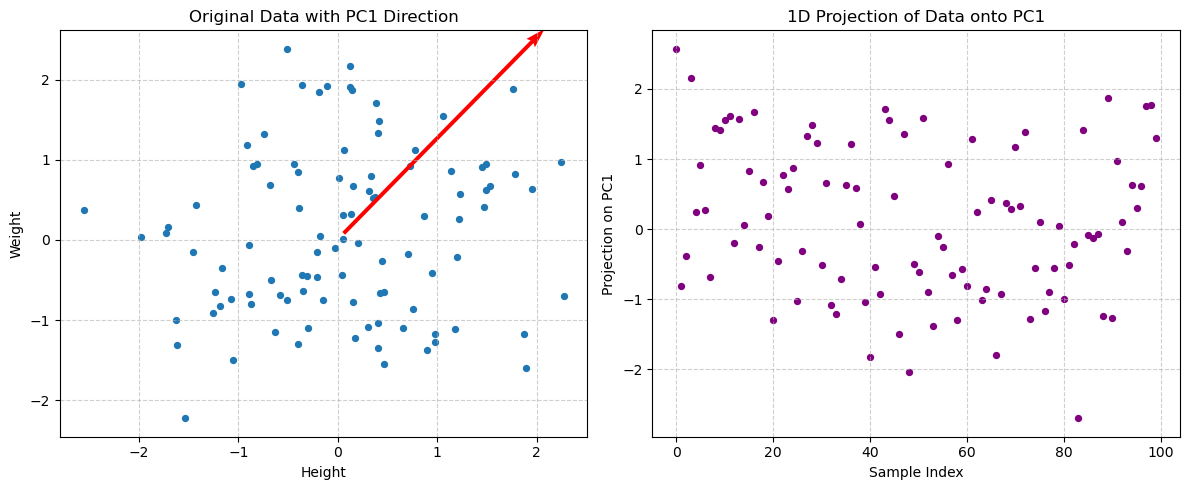

In [3]:
import numpy as np  # we import numpy for numerical computations
import pandas as pd  # we import pandas to load the CSV data
import matplotlib.pyplot as plt  # we import matplotlib to create the required plots
from scipy.linalg import eigh  # we use eigh because the covariance matrix is symmetric and numerically stable

df = pd.read_csv('data.csv')  # we load the standardized height–weight dataset
X = df.values.astype(float)  # we convert the dataframe to a float numpy array for linear algebra operations
n, d = X.shape  # we record the number of samples and dimensions to sanity check shapes
if d != 2:  # we ensure the dataset has exactly two features as specified in the assignment
    raise ValueError(f"Expected 2 features (height, weight) but found {d}")  # we stop early if the feature count is wrong

mu = X.mean(axis=0)  # we compute the mean vector to verify the dataset is standardized
sd = X.std(axis=0, ddof=1)  # we compute the sample standard deviation to verify unit variance
print(f"Mean (should be close to 0): {mu}")  # we print the means so we can check standardization quickly
print(f"Std  (should be close to 1): {sd}")  # we print the standard deviations so we can check standardization quickly

Sigma = np.cov(X, rowvar=False, ddof=1)  # we compute the 2x2 covariance matrix of the features
print("Covariance matrix:\n", Sigma)  # we display the covariance matrix for confirmation

evals, evecs = eigh(Sigma)  # we compute eigenvalues and eigenvectors of the symmetric covariance matrix
order = np.argsort(evals)[::-1]  # we sort eigenvalues in descending order to identify the principal components
evals = evals[order]  # we reorder the eigenvalues from largest to smallest
evecs = evecs[:, order]  # we reorder the eigenvectors to match the sorted eigenvalues

pc1 = evecs[:, 0]  # we select the first principal component direction corresponding to the largest eigenvalue
pc2 = evecs[:, 1]  # we keep the second principal component for completeness and potential diagnostics
var_explained = evals / evals.sum()  # we compute the proportion of variance explained by each principal component
print(f"Eigenvalues (descending): {evals}")  # we print eigenvalues to see the variance captured by each PC
print(f"Variance explained: {var_explained}")  # we print the variance fractions to report how much each PC captures
print(f"PC1 vector: {pc1}")  # we show the first principal component direction
print(f"PC2 vector: {pc2}")  # we show the second principal component direction

z1 = X @ pc1  # we project the 2D standardized data onto PC1 to obtain the 1D representation
X_proj_PC1 = np.outer(z1, pc1)  # we reconstruct the best rank-1 approximation of X along PC1 for visualization

print(f"First few 1D projections on PC1: {z1[:10]}")  # we print the first few projected values for sanity check

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # we create one figure with two subplots side by side

# we plot the original 2D standardized data and the PC1 direction on the first subplot
axes[0].scatter(X[:, 0], X[:, 1], s=18)  # we draw the scatter plot of standardized height–weight data
scale = 3 * np.sqrt(evals[0])  # we choose a reasonable scale for drawing the PC1 direction arrow
origin = mu  # we use the empirical mean as the origin for the PC1 arrow
axes[0].quiver(origin[0], origin[1], scale * pc1[0], scale * pc1[1],
               angles='xy', scale_units='xy', scale=1, color='red')  # we draw the PC1 vector in red
axes[0].set_title("Original Data with PC1 Direction")  # we set the title for the left plot
axes[0].set_xlabel(df.columns[0] if len(df.columns) >= 1 else "Feature 1")  # we label the x-axis
axes[0].set_ylabel(df.columns[1] if len(df.columns) >= 2 else "Feature 2")  # we label the y-axis
axes[0].grid(True, linestyle='--', alpha=0.6)  # we add a faint grid for clarity

# we plot the 1D projection on the second subplot
axes[1].scatter(np.arange(n), z1, s=18, color='purple')  # we plot each sample's projection value
axes[1].set_title("1D Projection of Data onto PC1")  # we add a title for the right plot
axes[1].set_xlabel("Sample Index")  # we label the x-axis with sample index
axes[1].set_ylabel("Projection on PC1")  # we label the y-axis to show projection values
axes[1].grid(True, linestyle='--', alpha=0.6)  # we add a faint grid for clarity

# save the figure before showing it
plt.tight_layout()
plt.savefig("PC1_projection.png", dpi=300, bbox_inches='tight')  # save this image for my report.
plt.show()  # display both subplots side by side
